In [1]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)

In [2]:
df=pd.read_csv('pjm_hourly_est.csv')
#pjm_load=pd.read_csv('PJM_Load_hourly.csv')

In [3]:
df.isna().sum()/df.shape[0]

Datetime    0.000000
AEP         0.319692
COMED       0.626970
DAYTON      0.319681
DEOK        0.676100
DOM         0.348212
DUQ         0.332062
EKPC        0.745689
FE          0.647294
NI          0.672112
PJME        0.184537
PJMW        0.196654
PJM_Load    0.815463
dtype: float64

In [4]:
df.dtypes

Datetime     object
AEP         float64
COMED       float64
DAYTON      float64
DEOK        float64
DOM         float64
DUQ         float64
EKPC        float64
FE          float64
NI          float64
PJME        float64
PJMW        float64
PJM_Load    float64
dtype: object

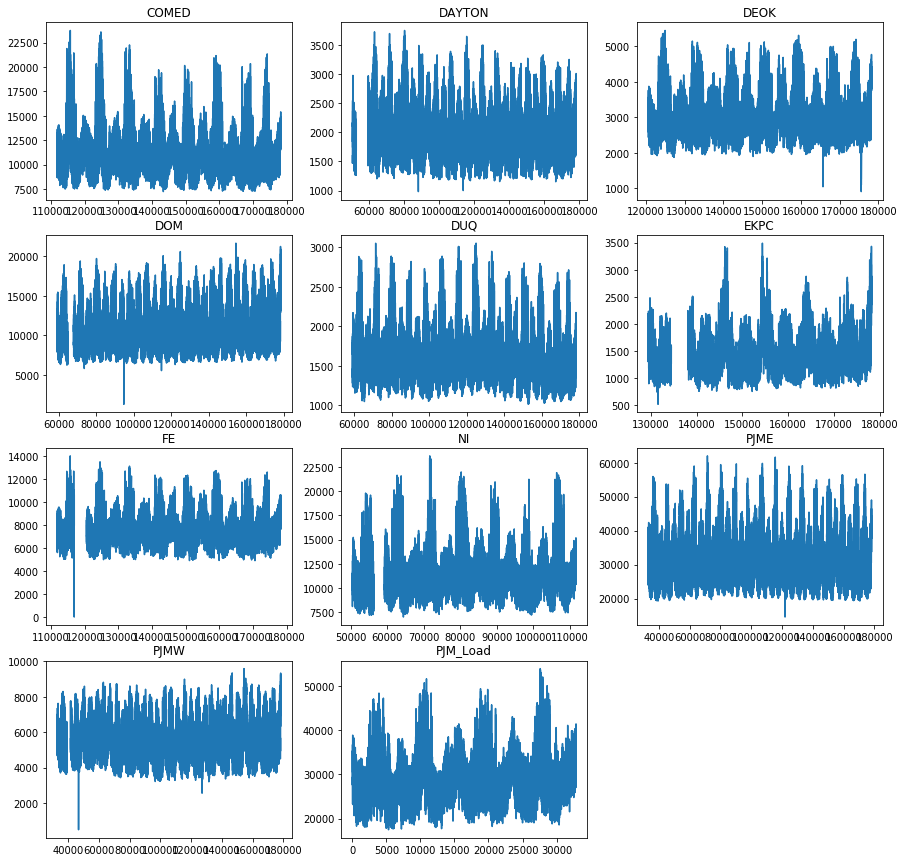

In [5]:
plt.figure(figsize=(15,15))
j=0
for i in df.columns[2:]:
    j+=1
    plt.subplot(4,3,j)
    plt.plot(df[i])
    plt.title(i)

In [6]:
pjme=df[['Datetime','PJME']]
pjme['Datetime'] = pd.to_datetime(pjme['Datetime'])
pjme['hour']=pd.to_datetime(pjme['Datetime']).dt.hour
pjme['month']=pd.to_datetime(pjme['Datetime']).dt.month
pjme['day']=pd.to_datetime(pjme['Datetime']).dt.day
print ('Unique values of month:',pjme.month.unique())
print ('Unique values of hour:',pjme.hour.unique())
pjme['hr_sin'] = np.sin(pjme.hour*(2.*np.pi/24))
pjme['hr_cos'] = np.cos(pjme.hour*(2.*np.pi/24))
pjme['mnth_sin'] = np.sin((pjme.month-1)*(2.*np.pi/12))
pjme['mnth_cos'] = np.cos((pjme.month-1)*(2.*np.pi/12))
pjme['day_sin'] = np.sin(pjme.day*(2.*np.pi/24))
pjme['day_cos'] = np.cos(pjme.day*(2.*np.pi/24))
pjme=pjme.sort_values(by='Datetime')
pjme=pjme.set_index(['Datetime'])
pjme=pjme[pjme.index>'2002-01-01 01:00:00']
pjme['onehourbefore']=pjme['PJME'].shift(1)
pjme['twohourbefore']=pjme['PJME'].shift(2)
pjme['threehourbefore']=pjme['PJME'].shift(3)
pjme['fourhourbefore']=pjme['PJME'].shift(4)
pjme['fivehourbefore']=pjme['PJME'].shift(5)
pjme['sixhourbefore']=pjme['PJME'].shift(6)
pjme['sevenhourbefore']=pjme['PJME'].shift(7)
pjme.dropna(inplace=True)

C:\Users\1000260937\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\1000260937\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\1000260937\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Unique values of month: [12  1 11 10  9  8  7  6  5  4  3  2]
Unique values of hour: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0]


C:\Users\1000260937\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\1000260937\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\1000260937\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

<Figure size 432x288 with 0 Axes>

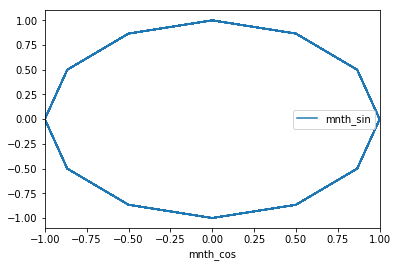

<Figure size 432x288 with 0 Axes>

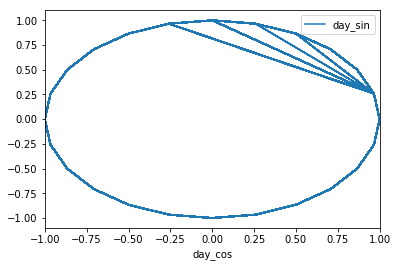

<Figure size 432x288 with 0 Axes>

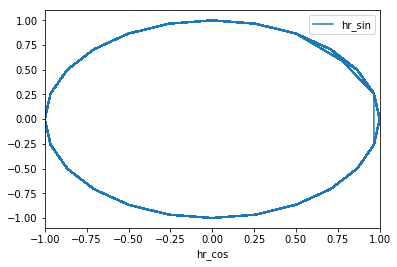

In [7]:
plt.figure()
pjme.plot(x='mnth_cos',y='mnth_sin')
plt.figure()
pjme.plot(x='day_cos',y='day_sin')
plt.figure()
pjme.plot(x='hr_cos',y='hr_sin')

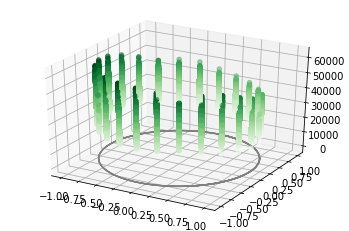

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
ax.scatter3D(pjme['hr_cos'], pjme['hr_sin'], pjme['PJME'],c=pjme['PJME'],cmap='Greens');

In [9]:
pjme.columns

Index(['PJME', 'hour', 'month', 'day', 'hr_sin', 'hr_cos', 'mnth_sin',
       'mnth_cos', 'day_sin', 'day_cos', 'onehourbefore', 'twohourbefore',
       'threehourbefore', 'fourhourbefore', 'fivehourbefore', 'sixhourbefore',
       'sevenhourbefore'],
      dtype='object')

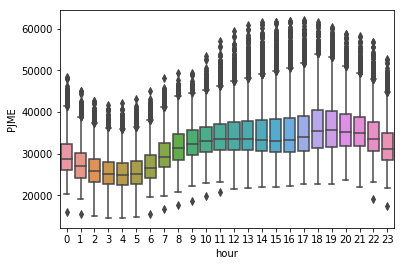

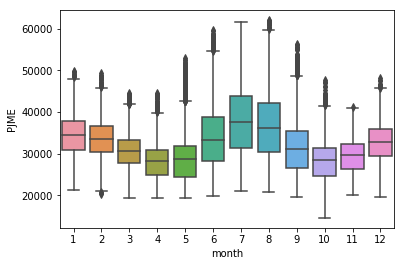

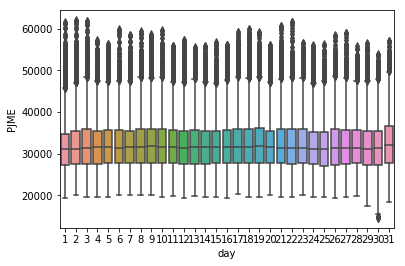

In [10]:
import seaborn as sns
sns.boxplot(x=pjme.hour,y=pjme.PJME)
plt.figure()
sns.boxplot(x=pjme.month,y=pjme.PJME)
plt.figure()
sns.boxplot(x=pjme.day,y=pjme.PJME)

In [11]:
pjme.isna().sum()

PJME               0
hour               0
month              0
day                0
hr_sin             0
hr_cos             0
mnth_sin           0
mnth_cos           0
day_sin            0
day_cos            0
onehourbefore      0
twohourbefore      0
threehourbefore    0
fourhourbefore     0
fivehourbefore     0
sixhourbefore      0
sevenhourbefore    0
dtype: int64

In [13]:
import warnings
warnings.filterwarnings("ignore")

# standardize PJME

In [14]:
mini=pjme['PJME'].min()
maxi=pjme['PJME'].max()

In [18]:
#print(pjme.Datetime.min())
#print(pjme.Datetime.max())
pjme['std_PJME']=(pjme['PJME']-mini)/(maxi-mini)
features = ['mnth_sin','mnth_cos','hr_sin','hr_cos','std_PJME']
#features = ['PJME']
X=pjme[features]
cols, names =list(),list()
start_time=0
last_time=5
time=last_time-start_time
for i in range(start_time,last_time+1):
    cols.append(X.shift(i))
    names += [('%s(t-%d)' % (X.columns[j], i)) for j in range(X.shape[1])]
agg = pd.concat(cols, axis=1)
agg.columns = names
drop_col=[]
for i in agg.columns:
    if 't-0' in i:
        drop_col.append(i)
train=agg[(agg.index>'2005-01-01 00:00:00')&(agg.index<'2012-01-01 00:00:00')]
X_train =train.drop(drop_col,axis=1)
X_train = np.array(X_train).reshape(( X_train.shape[0],time,int(X_train.shape[1]/(time))))
y_train=train['std_PJME(t-0)']
test=agg[(agg.index>='2012-01-01 00:00:00')]
X_test =test.drop(drop_col,axis=1)
X_test = np.array(X_test).reshape(( X_test.shape[0],time,int(X_test.shape[1]/(time))))
y_test=test['std_PJME(t-0)']

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 61328 samples, validate on 57740 samples
Epoch 1/100
61328/61328 [==============================] - 9s 153us/step - loss: 0.0092 - val_loss: 6.3930e-04
Epoch 2/100
61328/61328 [==============================] - 10s 170us/step - loss: 0.0018 - val_loss: 4.5862e-04
Epoch 3/100
61328/61328 [==============================] - 11s 172us/step - loss: 0.0013 - val_loss: 4.2778e-04
Epoch 4/100
61328/61328 [==============================] - 10s 170us/step - loss: 0.0011 - val_loss: 3.9882e-04
Epoch 5/100
61328/61328 [==============================] - 11s 182us/step - loss: 9.0361e-04 - val_loss: 3.9392e-04
Epoch 6/100
61328/61328 [==============================] - 11s 176us/step - loss: 7.8934e-04 - val_loss: 3.9561e-04
Epoch 7/100
61328/61328 [===========

61328/61328 [==============================] - 11s 173us/step - loss: 3.1840e-04 - val_loss: 1.7649e-04
Epoch 63/100
61328/61328 [==============================] - 10s 169us/step - loss: 3.1720e-04 - val_loss: 1.6501e-04
Epoch 64/100
61328/61328 [==============================] - 10s 170us/step - loss: 3.1788e-04 - val_loss: 1.7328e-04
Epoch 65/100
61328/61328 [==============================] - 11s 173us/step - loss: 3.1378e-04 - val_loss: 1.7246e-04
Epoch 66/100
61328/61328 [==============================] - 11s 171us/step - loss: 3.0913e-04 - val_loss: 2.0125e-04
Epoch 67/100
61328/61328 [==============================] - 10s 167us/step - loss: 3.1271e-04 - val_loss: 1.7288e-04
Epoch 68/100
61328/61328 [==============================] - 10s 170us/step - loss: 3.1147e-04 - val_loss: 1.7386e-04


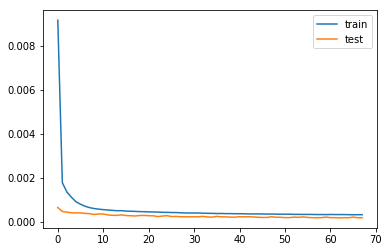

In [19]:
import collections
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,LSTM,GRU
from keras.utils.np_utils import to_categorical
from keras import initializers, regularizers, constraints
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint('../model2.h5', save_best_only=True,save_weights_only=False)]
model = Sequential()
model.add(LSTM(units=16, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=16))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

# model output is next price normalised to 10th previous closing price
# train model on data
# note: eth_history contains information on the training error per epoch
history = model.fit(X_train, y_train, callbacks=callbacks,
                            epochs=100, batch_size=100,
                   validation_data=(X_test, y_test))
#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model = load_model('../model2.h5')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

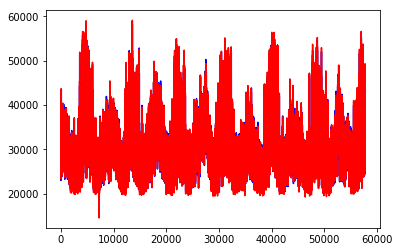

In [20]:
yhat = model.predict(X_test)*(maxi-mini)+mini
actual_y=y_test*(maxi-mini)+mini
plt.plot(yhat,color='Blue')
plt.plot(actual_y.reset_index()['std_PJME(t-0)'],color='Red')

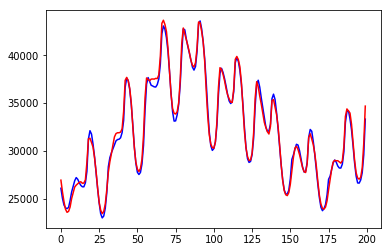

In [21]:
plt.plot(yhat[:200],color='Blue')
plt.plot(actual_y.reset_index()['std_PJME(t-0)'][:200],color='Red')

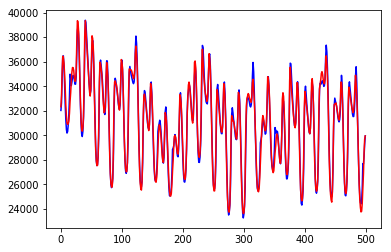

In [22]:
plt.plot(yhat[1000:1500],color='Blue')
plt.plot(np.array(actual_y.reset_index()['std_PJME(t-0)'][1000:1500]),color='Red')